<a href="https://colab.research.google.com/github/gregorywmorris/MLZoom2022/blob/main/Greg_Car_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
# Import Libraries
import pandas as pd # Import Pandas library
import numpy as np # Import NumPy

import seaborn as sns
from matplotlib import pyplot as pyplot
%matplotlib inline
# Allows the plot to be displayed in the notebook

## Section 2.1: The Car Price Prediction Project

**RECALL:** In the first chapter, we discussed how to develop a model that would help users sell the car at an optimal price.

The dataset for this car prediction project was obtained from a [Kaggle competition](https://www.kaggle.com/datasets/CooperUnion/cardataset).

*   Prepar data and do an exploratory data analysis (EDA)
*   Linear regression for predicting price
*   Understand the internals of linear regression
*   Evaluating the model with RMSE
*   Feature engineering
*   Regularization
*   Using the model










## Section 2.2: Data Preparation

In [128]:
# Input the data from the URL.
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [129]:
!wget $data # Get the data.

--2022-09-19 17:17:47--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.009s  

2022-09-19 17:17:48 (155 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [130]:
df = pd.read_csv('data.csv') # Load the data using the read_csv command; store
# as a dataframe. Make sure to input the correct file name in the argument.

In [131]:
df.head() # Display the first five rows of the dataframe.

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We need to do a bit of cleaning; start by adding some uniformity to the column headers.

# Section 2.3 Exploritory Data Analysis

## Normalize the Dataset

In [132]:
df.columns # Generate the column names to investigate.

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [133]:
df.columns = df.columns.str.lower().str.replace(' ', '_') # Makes all of the strings for
# column names lowercase; we can also chain with another string command to
# replace the spaces in the strings with an underscore. Then, set our new
# column equal to our column's dataframe.

In [134]:
df.head() # Display the first five rows of the data frame to confirm changes and review next normaliztion needed. 

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We observe that the elements in the series are not standardized. So, we need to apply consistency.

String operations will not work on numerical values, so we need to sort the data.

In [135]:
df.dtypes # Displays all of the data types for each column so that we can identify the data types and then normalize them.

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object



*   strings = object
*   integers = int64
*   numerical values w/ decimal = float64





In [136]:
# We are interested in strings.
df.dtypes == 'object' # Displays a boolean to indicate which column outputs
# strings.

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [137]:
df.dtypes[df.dtypes == 'object'] # Extracts only the columns which have strings.

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

The objects are all values in the series, the column headers are the indexes in the series. We need to access the indexes.

In [138]:
# Identify the columns that are strings, object type.
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [139]:
# We can convert them to a python list (for no particular reason) and store it
# as a variable, strings:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [140]:
strings # Display strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

We can loop over the column names.

In [141]:
df['make'].str.lower().str.replace(' ', '_') # Sets all characters in the make
# column to be lowercase and replaces all the spaces with underscores.

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

We want to perform the operation we just did for the make column to all the other columns.

In [142]:
for col in strings: #strings is the variable created above
  df[col] = df[col].str.lower().str.replace(' ', '_')

# This for loop runs the previous operation in a systemic fashion throughout
# the remaining columns and stores it as df[col].

In [143]:
df.head() # Display the first five rows of the dataframe.

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [144]:
df.dtypes # Display the column data types.

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## Section 2.3: Exploratory Data Analysis

In [145]:
df # Display the dataframe.

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [146]:
df.columns # Display the columns.

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [147]:
# We can iterate over the columns in order to print specific information:
for col in df.columns:
  print(col)
  print(df[col].head())
  print()
# This iteration prints the first five values of each column.

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

## Returning Unique Values

In [148]:
for col in df.columns:
  print(col) # column name
  print(df[col].unique()[:5]) # Print the first five unique values of each column.
  print(df[col].nunique()) # Print the unique values for the entire column.
  print() # line break

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## Visualization

In [149]:
df # Display data frame - we will next look at the MSRP column.

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


## Price Distribution

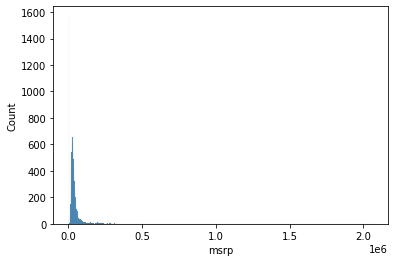

In [150]:
sns.histplot(df.msrp) # Plots a histogram of the MSRP column.

This graph is not very good, we need a better resolution.

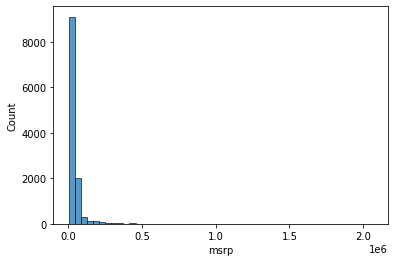

In [151]:
sns.histplot(df.msrp, bins = 50) # Better resolution plot.

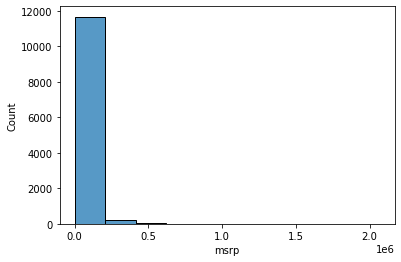

In [152]:
sns.histplot(df.msrp, bins = 10)

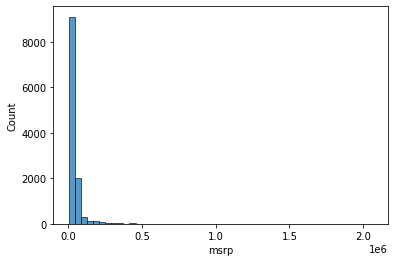

In [153]:
sns.histplot(df.msrp, bins = 50) # Use this plot. The 1e6 at the bottom is like
# scientific notation, and is meant to convey 1M.

The issue with this graph is that it is meant to convey how cars are priced. Very few cars are priced at $1M dollars, but most cars are priced closer to 0.0e6. This can be thought of as a ***long tail distribution***.

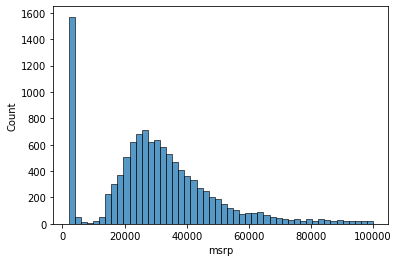

In [154]:
# So, we can plot a historgram by setting the MSRP scope to be less than $100K.
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

The histogram displays what he minimum price value should be for cars with the far left bar acting as a guideline. Suppose we increase the resolution by looking at the MSRP being less than $60K.

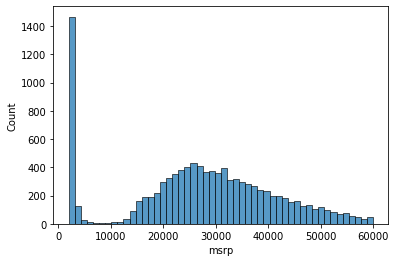

In [155]:
sns.histplot(df.msrp[df.msrp < 60000], bins = 50)
# Historgram plot by setting the MSRP scope to be less than $60K.

Now that there is a stronger resolution to the histogram, return to following along with the course.

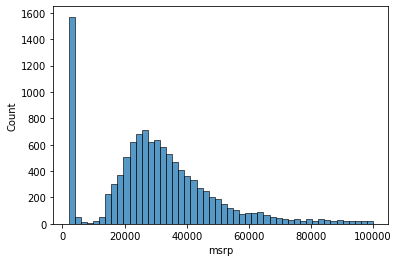

In [156]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)
# Historgram plot by setting the MSRP scope back to less than $100K.

Long tail distribution is not good for machine learning because it will confuse our model. So, we want to get rid of the long tail.

## Apply Logarithmic Distribution

To reduce the tail seen in the plot

In [157]:
np.log([1, 10, 1000, 100000]) # Apply logarithmic distribution.

array([ 0.        ,  2.30258509,  6.90775528, 11.51292546])

In [158]:
np.log([0, 1, 10, 1000, 100000]) # Adding zero is problematic, because at zero,
# it does not exist.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([       -inf,  0.        ,  2.30258509,  6.90775528, 11.51292546])

In [159]:
# The problem with zero can be prevented by adding zero to each of the
# logarithmic values.
np.log([0 + 1, 1 + 1,  10 + 1, 1000 + 1, 100000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [160]:
# There is a function in NumPy that adds the "+ 1" to the above logarithm array
# automatically.
np.log1p([0, 1, 10, 1000, 100000]) # The 1p stands for "+ 1."

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [161]:
price_logs = np.log1p(df.msrp) # Apply the log1p to the MSRP column; store as
# price_logs.

In [162]:
price_logs # Display price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

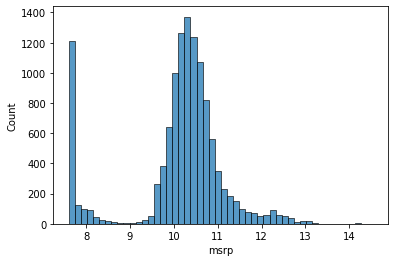

In [163]:
sns.histplot(price_logs, bins = 50) # Plot price_logs on histogram.

This graph represents the normal distribution curve and it resembles a bell curve (despte the tick at the far left). This is ideal for models. This is what we would incorporate into our machine learning practices.

## Missing Values

In [164]:
df # Display data frame

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


We want to search for missing values.

In [165]:
df.isnull().sum() # Summarizes the missing values in each column.

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Section 2.4: Setting Up the Validation Framework

Recall: From chapter 1, we take our data and we split it into three parts: training data, validation data, and test data. The percentage into which we can split our data is up to your own discretion.

We train a model, and we test to see how it performs against a validation dataset. If the training dataset performs well against the training dataset, we use it against the testing dataset.

Each part will have its own feature matrix it's own target variable y.

Let's draw it.

The validation data and the test data will be split to 20% each, leaving 60% to work with the training data.

We need to calculate how much 20% is from our dataframe.

In [166]:
n = len(df) # Display the dataframe's total length; stored as n.

In [167]:
n

11914

In [168]:
len(df) * 0.2 # Display 20% of the data frame.

2382.8

In [169]:
n_val = int(n * 0.2) # Round the decimal number down to an integer,
# stored as n_val, will act as our validation dataset.
n_val # Display validation dataset value.

2382

In [170]:
n_test = int(n * 0.2) # Round the decimal number down to an integer,
# stored as n_test, will act as our test dataset.
n_test # Display test dataset value.

2382

In [171]:
n_train = n - n_val - n_test # Subtract the validation and test dataset from
# the entire dataset to get the value for your training dataset,
# stored as n_train.
n_train # Display training dataset.

7150

In [172]:
n, n_val + n_test + n_train # Displays two equal values between each dataset,
# and the original dataset.

(11914, 11914)

In [173]:
n_val, n_test, n_train # Display the size of each dataset.

(2382, 2382, 7150)

## Create a new dataframe

This would lock the first three rows (read as: a list) in the dataframe's index:

df.iloc[0, 1, 2]

Alternatively, you can index lock a range; this one locks the first 10 records (excluding 10) from index 0 to index 9:

df.iloc[:10]

We can lock from index 10 to index 20 (not including 20):

df.iloc[10:20]

Or, if we want to index lock the last four records for this entire data frame (11,910 - 11,913):

df.iloc[11910:]

In [174]:
df_train = df.iloc[n_train:] # Locks the beginning 7,150 indexes in the
 # entire dataframe; stored as df_train.
df_val = df.iloc[n_train:n_train + n_val] # Locks the next 2,382 indexes up to 
 # the test dataframe; stored as df_val.
df_test = df.iloc[n_train + n_val:] # Locks the remaining indexes in the 
 # dataframe; stored as df_test.

## Shuffle the Records in the Dataframe

If we display the validation dataframe, we will see 

In [175]:
df_val # Display validation dataset.

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


We need to shuffle each row among the different dataset so that each of the different makes are randomly distributed among the df_test, df_validation_ and df_train. If there is some accidental order in the dataset, we want to break it.

Recall that with the iloc function, we can specify an arbitrary sequence of numbers.

For example: df.iloc[[10, 0, 3, 5]]

In [176]:
idx = np.arange(n) # Generates an array of numbers from 1 to (n - 1); uses NumPy 
# function called arange; stored as idx (short for index).
# n is the variable set above
idx # Display index

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [177]:
np.random.seed(2) # Establish a reproduceable shuffle
np.random.shuffle(idx) # Shuffle the index.

In [178]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

Now that the index is shuffled, we apply it to our traning dataset, our test dataset, and our validation dataset by extracting the appropriate amount of data from the entire dataset.

## Newly Shuffled Dataframes

In [179]:
df_train = df.iloc[idx[:n_train]] # Locks the beginning 7,150 indexes in the
 # newly-shuffled index; stored as df_train.
df_val = df.iloc[idx[n_train:n_train + n_val]] # Locks the next 2,382 indexes up 
 # to the test dataframe; stored as df_val.
df_test = df.iloc[idx[n_train + n_val:]] # Locks the remaining indexes in the 
 # dataframe; stored as df_test.

In [180]:
df_train.head() # Display first five rows of the training dataset.

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


Check the lengths of each dataset

In [181]:
len(df_train), len(df_val), len(df_test) # Display lengths for each dataset.

(7150, 2382, 2382)

Reset the index for each data frame.

In [182]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

## Get the Target Variable, y

In [183]:
# use numpy becasue we do not need the overhad of a dataframe
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

Remove the MSRP column from the training dataframe, the test dataframe, and the validation dataframe using the del command.

In [184]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [185]:
len(y_train), len(y_val), len(y_test) # Sanity check

(7150, 2382, 2382)

## Section 2.5: Linear Regression

Begin with the feature matrix for the training data:

In [186]:
df_train.iloc[10] # Displays row 10 of the training data.

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

Take the engine_hp, city_mpg, and popularity elements:

# Example on Training Data

In [187]:
x_i = [453, 11, 86] # This is our feature matrix, x-sub-i for i = 10.
# hp = 453, city mpg = 11, popularity = 86

Now, we need to write a function that takes in this X-sub-i and produces a prediction y-sub-i.

In [188]:
def g(x_i): # Define command; defines g(xi)
  # do something
  return 10000
# This is something we implement; this will be our linear regression.

In [189]:
g(x_i)

10000

# Implementation

Consider x_i, where i = 10; we extracted elements from the 10th row of the training dataframe.

x_i = [453, 11, 86]
x_i1 = 453
x_i2 = 11
x_i3 = 86

The formula for finding the linear regression would look something like this:

g(x_i) = w_0 + w_1*x_i1 + w_2*x_i2 + w_3*x_i3

w_0 is some prediction we make without knowing about the car, aka bias term. Then, w_1, w_2, and w_3, are multipliers that will be considered with respects to the features we extracted from the 10th row.

# Implementation in Code

In [190]:
x_i

[453, 11, 86]

In [191]:
w_0 = 7.17 # w_0 is referred to as our biased term.
w_0 

7.17

In [192]:
w = [0.01, 0.04, 0.002] # The weights for the features we selected. For this example they were just chosen rather than justified for project purposes.
w 

[0.01, 0.04, 0.002]

In [193]:
def linear_regression(x_i): # Define command; defines linear_regression(x_i)
  n = len(x_i)

  pred = w_0
  # g(x_i) = w_0 + w_1x_i1 + w_2x_i2 + w_3*x_i3
  for j in range(n):
    pred = pred + w[j] * x_i[j]
  # do something
  return pred
# This is something we implement; this will be our linear regression.

In [194]:
linear_regression(x_i)

12.312

Start with the biased term: w_0 = 7.17; this is what we predict about the car if we don't know anything about it. What would we predict about the car if we do not know anything about the car.

Then we multiply each of our featurs by their corresponding weights, and add them all together to get the expression:

w_0 + (x_i1)(w_1) + (x_i2)(w_2) + (x_i3)(w_3)

Plug in our values:

7.17 + (453)(0.01) + (11)(0.04) + (86)(0.002) = 12.3

We do know something about the car; we know it has 453 HP. If the car had 1 HP, and it was multipled by 0.01, we would get 0.01; corollary, if the car had 100 HP, and it was multipled by 0.01, we would get 1. We draw a correlation between horse power and price; that is, the more horse power a car has, the more expensive it is.

The the next feature, we assess MPG in the city (we know this particular car gets 11 MPG in the city. The more fuel efficient that a car is in the city, the more expensive it is. So, if a car got 10 MPG in the city, we know that it is 0.04% cheaper than a car that gets 11 MPG.

The last feature is a car's popularity; in this case 86 mentions on Twitter. This weight would be lower in this case. The car would need to be mentioned more often to be more expensive. Increasing demand can increase price.

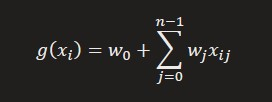

# Getting Exponents

We need to undo the logarithm that we applied earlier: log(y+1), so we will do the expontnet.

In [195]:
np.exp(12.312) # Prediction value from above

222348.2221101062

In [196]:
np.exp(12.312) - 1

222347.2221101062

In [197]:
np.expm1(12.312) # A python function to include "minus 1" into the operation.

222347.2221101062

In [198]:
np.log1p(np.expm1(12.312)) # Proof

12.312

# Section 2.6: Linear Regression: Vector Form

In [199]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [200]:
# Lets use Horespower, MPG, and poularity. Formula is g(xi) = W0 (prediction) + w1*xi1 + w2*xi2 + w3*xi3 (weight * features)
# for the rolls-royce shown above
xi = [453,11,86]
# Default value
w0 = 7.17 
# weights given for chosen features
w = [0.01,0.04,0.002]

In [201]:
# This will execute a dot product between x_i (feature values) and w (weights)
def dot(x_i, w):
  n = len(x_i)

  res = 0.0

  for j in range(n):
    res = res + x_i[j] * w[j]

  return res

In [202]:
# Copy the linear regression function from earlier; and modify it.

def linear_regression(x_i): # Define command; defines linear_regression(x_i)
  return w_0 + dot(x_i, w) # built in dot function

Consider the idea of an extra feature to be multiplied with our biased term, that equals 1.

So the equation would actually look like this:

(w_0)*(x_iO) + (x_i1)(w_1) + (x_i2)(w_2) + (x_i3)(w_3)

where x_i0 = 1.

So,

w = [w_0, w_1, w_2, . . . , w_n]; an n + 1 dimensional vector.

x_i = [x_i0, x_i1, x_i2, . . . , x_in]
x_i = [1, x_i1, x_i2, . . . , x_in]

(w^T)(x_i) = (x_i)^T(w) = w_0 + . . .

We want to get everything into vector form.

In [203]:
w_new = [w_0] + w # Generates a weighted vector with the biased term. Note this term is multiplied by 1 when applied
w_new

[7.17, 0.01, 0.04, 0.002]

In [204]:
def linear_regression(x_i): # Define command; defines linear_regression(x_i)
  x_i = [1] + x_i # add in the default value for car. The one mentioned in the line above.
  return w_0 + dot(x_i, w_new)

In [205]:
linear_regression(x_i) # Display the linear regression.

19.482

In [206]:
x_i = [453, 11, 86]
w_0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w_0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [207]:
x_1  = [1, 148, 24, 1385] # Features for x_1 - list
x_2  = [1, 132, 25, 2031] # Features for x_2 - list
x_10 = [1, 453, 11, 86] # Features for x_10 - list

X = [x_1, x_2, x_10] # Creates a list of list of features

X = np.array(X) # Converts everything into a 2D NumPy array.
X # Display X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [208]:
def linear_regression(X):
  return X.dot(w_new) #applying weighted values against the features

In [209]:
linear_regression(X)  # Display linear regression in vector form. i.e. this is our prediction based on the the feature values and weights. 

array([12.38 , 13.552, 12.312])

#Section 2.7: Training Linear Regression: Normal Equation

We have g(X) = Xw (read as: the features matrix multiplied by the weights vector).

Xw should be approximately equal to y; it may converge on the value of y, or it may end up equal to y, but there are times where it is impossible.

I = inverse <br>
T = transpose

(XIX = 1)w = XIy (May not have an inverse)

Gram metrix when inverse usually exists (multiply both sides by XT)

(XTX)I*X= identity matrix) w = (XTX)I *XTy

In [266]:
def train_linear_regression(X,y): # Implement the training program
  pass

In [267]:
X # Display the feature matrix

array([[1.000e+00, 1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 1.000e+00, 1.530e+02, 3.100e+01, 8.600e+01]])

Note, that the feature matrix is problematic because it has more column than rows. So I returned to our featur matrix's original definition, and modified it below. This matrix will have more rows than columns.

In [294]:

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [153, 31, 86],
     
] # Creates a list of lists

In [295]:
X = np.array(X) # Converts everything into a 2D NumPy array.
X # Display X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 153,   31,   86]])

In [270]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120] # Define y
# Provided for example purposes

In [271]:
XTX = X.T.dot(X) # Dot product of X-transpose and X

In [272]:
XTX_inv = np.linalg.inv(XTX) # Detemine XTX inverse
XTX_inv

array([[ 2.92317922e-06, -1.29788223e-05, -7.59561648e-08],
       [-1.29788223e-05,  2.60597525e-04, -3.45422433e-06],
       [-7.59561648e-08, -3.45422433e-06,  2.30030394e-07]])

In [273]:
XTX_inv.dot(X.T).dot(y) # Obtain dot product between the XTX and XTX_inv to 


array([0.34973415, 3.1398204 , 0.026993  ])

We need to add a column of ones to the far left of the matrix for the default or bias value.

In [274]:
#ones = np.ones(9) # Generates an array of 9 one's.

To be safe, we can acutally generate it based on the shape of X by extracting the number of rows:

In [293]:
ones = np.ones(X.shape[0])

In [276]:
X = np.column_stack([ones, X]) # Combine the ones array with X; overwrite as X
X 

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 1.530e+02, 3.100e+01, 8.600e+01]])

We want to implement the following into code:

w = (X^T * X)^(-1) * X^T * y

In [286]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000] # Define y

In [287]:
XTX = X.T.dot(X) # Dot product of X-transpose and X

In [288]:
XTX_inv = np.linalg.inv(XTX) # Detemine XTX inverse

In [289]:
w_full = XTX_inv.dot(X.T).dot(y) # Defines w.

In [290]:
W_0 = w_full[0]
w = w_full[1:]

In [291]:
w_0, w

(291.0462245987429, array([  -9.54495911, -160.77058197,   -0.2773146 ]))

In [283]:
def train_linear_regression(X, y): # Implement the training program
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [296]:
train_linear_regression(X, y)

(22510.087549204396, array([  -9.54495911, -160.77058197,   -0.2773146 ]))

# Section 2.8: Baseline Model for Car Price Prediction Project

In [297]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [300]:
df_train.dtypes # look for numberical data (int and float)

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [315]:
df_train.select_dtypes(include=np.number).columns.tolist()

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [316]:
df_train.select_dtypes(include='object').columns.tolist()

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

We are going to build a model using the numerical data from the engine_hp, engine_cylinders, highway_mpg, city_mpg, and popularity. We are going to extract the columns from the training data frame.

In [317]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


Next, we need to extract the values from these columns.

In [328]:
X_train = df_train[base].values # Extract the values from the columns in the 
# base array; stored as X_train.

In [329]:
df_train[base].isnull().sum() # Show number of null values in base columns.

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

The easiest way to address the problem with null values is to fill the missing values with 0.

By filling in these missing values with 0, we can make our model ignore these features.

In [330]:
X_train = df_train[base].fillna(0).values # Set X_train to equal the matrix with
# no missing values.

In [331]:
w_0, w = train_linear_regression(X_train, y_train) # Apply
# train_linear_regression to X_train and y_train.
w_0, w # Display w_0, w

(7.927257388069986,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [332]:
y_pred = w_0 + X_train.dot(w) # Establish the prediction for y; store as y_pred
y_pred # Display y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

Now, we can plug in these predictions and see if they look similar to the original target variable.

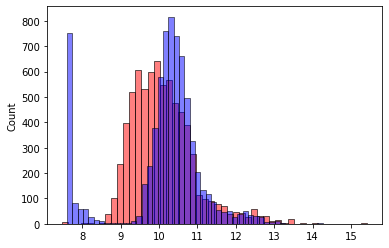

In [333]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

# Section 2.9: Root Mean Squared Error (RMSE)


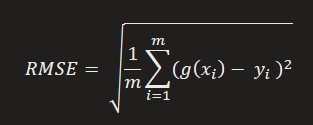

In [ ]:
def rmse(y, y_pred):
  error = y - y_pred # Difference between y and y_pred.
  se = error ** 2 # Square to eliminate negative values; square error correction
  mse = se.mean() # Finds the mean
  return np.sqrt(mse) # Finds square root of mse.

In [ ]:
rmse(y_train, y_pred) # RMSE - closer to zero, the better.

0.7554192603920132

# Section 2.10: Computing RMSE on Validation Data

In [ ]:
# This is the code for training the model.

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)

In [ ]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
len(y_val)

2382

In [ ]:
len(y_pred)

7150

In [ ]:
# Training

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

# Validation

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.761653099130156

# Section 2.11: Feature Engineering

In [ ]:
2017 - df_train.year # Compute the age of the cars.

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [ ]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)

In [ ]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [ ]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [ ]:
X_train = prepare_X(df_train)

In [ ]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [ ]:
def prepare_X(df):
    df = df.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

# Validation

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058299

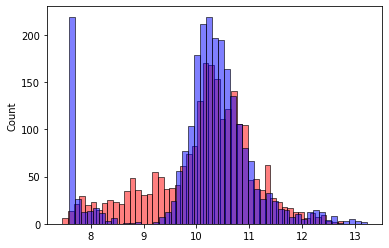

In [ ]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

# Section 2.12: Categorical Variables

In [ ]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [ ]:
df_train.dtypes # All 'object' datatypes are categorical variables.

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

The column, number_of_doors may not look like it; it looks like a number, but it is also a categorical variable.

In [ ]:
df_train.number_of_doors # Display the number_of_doors for each row.

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [ ]:
df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int') 
# Converts the boolean into an integer, for 2-door vehicles.

In [ ]:
df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int') 
# Converts the boolean into an integer, for 3-door vehicles.

In [ ]:
df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int') 

# Converts the boolean into an integer, for 4-door vehicles.

In [ ]:
del df_train['num_doors_2']
del df_train['num_doors_3']
del df_train['num_doors_4']

In [ ]:
makes = list(df.make.value_counts().head().index)

The previous operations can be written into a for loop.

In [ ]:
for v in [2, 3, 4]:
  df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
      df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
      features.append('num_doors_%s' % v)

    for v in makes:
      df['make_%s' % v] = (df.make == v).astype('int')
      features.append('make_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [ ]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   1.,   0.],
       [148.,   4.,  37., ...,   0.,   0.,   0.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   1.,   0.,   0.]])

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849556795

In [ ]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
      df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
      features.append('num_doors_%s' % v)

    for v in makes:
      df['make_%s' % v] = (df.make == v).astype('int')
      features.append('make_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849556795

In [ ]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

In [ ]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [ ]:
categories = {}

for c in categories:
    categories[c] = list(df[c].value_counts().head().index)

In [ ]:
categories

{}

In [ ]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categories.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5157995641501678

In [ ]:
w0, w

(10.659085118454128,
 array([ 3.71362023e-03,  7.55896758e-02, -3.94226970e-03,  1.05656089e-02,
        -4.55063701e-05, -9.45102320e-02, -1.26327322e+00, -1.47267350e+00,
        -1.30655848e+00]))

# Section 2.13: Regularization

In [ ]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X) # Convert to a NumPy array.
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [ ]:
y = [1, 2, 3, 1, 2, 3]

In [ ]:
XTX = X.T.dot(X) # Multiply X-transpose by X.
XTX # Display XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [ ]:
# XTX_inv = np.linalg.inv(XTX) # Generates an error because the inverse does not 
# exist.

In [ ]:
XTX_inv.dot(X.T).dot(y)

ValueError: ignored

In [ ]:
XTX = [
    [1, 2, 2],
    [2, 1., 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [ ]:
np.linalg.inv(XTX)

In [ ]:
np.eye(3) # Identity matrix; I_3;

In [ ]:
XTX = XTX + 0.01 * np.eye(3) # Add X to the Identity matrix.
XTX # Display XTX

In [ ]:
np.linalg.inv(XTX)

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

# Section 2.14: Tuning the Model

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

In [ ]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

# Section 2.15: Using the Model

# Section 2.16: Car Price Prediction Summary